# Alan Hurtarte
## 19000590

---

## Laboratorio 2
### Algoritmos en la Ciencia de Datos

---


# Problema 1

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 14 09:23:35 2019

@author: alanhurtarte
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def graph(data, lr):
#     plt.plot(data['grad_abs'], data['Iter'])
    plt.plot(data['Iter'], data['grad_abs'])
    plt.xlabel('Iteration (k)')
    plt.ylabel('Gradient norm')
    plt.suptitle('Learning rate '+str(lr))
    plt.show()

def f_prime(x, Q, c):
    mul_q_x = np.matmul(Q, x)
    return mul_q_x + c

def f(x, Q, c):
    xt = x.transpose()
    ct = c.transpose()
    return 0.5*np.matmul(np.matmul(xt[0], Q), x) + np.matmul(ct[0], x)

def gradientDescent(x0, epsilon, N, Q, c, learning_rate):
    xi = x0
    f_hat = f_prime(xi, Q, c)
    i = 0
    epochs = []
    f_vals = []
    directions = []
    Xn = []
    axs = []
    ax = 0.1
    while np.linalg.norm(f_hat) >= epsilon and i < N:
        if hasattr(learning_rate, '__call__'):
            ak = learning_rate(i, f_hat, Q)
        else:
            ak = learning_rate
        f_hat = f_prime(xi, Q, c)
        xi = xi - ak * f_hat
        i += 1
        epochs.append(i)
        Xn.append(xi)
        directions.append(-1*(f_hat))
        f_vals.append(np.linalg.norm(f_hat))
        axs.append(ax)
    
    results = pd.DataFrame({'Iter':epochs, 'Xn':Xn, 'Directions': directions, 'grad_abs': f_vals})
    return results, f_hat
  


## Valores 1
### Step size exacto

In [6]:

def exactStepSize(*args):
    f_hat = args[1]
    Q = args[2]
    return np.matmul(f_hat.transpose(), f_hat) / np.matmul(np.matmul(f_hat.transpose(), Q), f_hat)

In [7]:
x = np.array([[3], [5], [7]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = exactStepSize
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data

Iter                                                 Xn                                        Directions   grad_abs
0      1                              [[2.0], [5.0], [2.0]]                                [[-2], [0], [-10]]  10.198039
1      2                              [[2.0], [2.0], [2.0]]                          [[-0.0], [-6.0], [-0.0]]   6.000000
2      3                              [[0.5], [2.0], [0.5]]                          [[-3.0], [-0.0], [-3.0]]   4.242641
3      4                              [[0.5], [0.5], [0.5]]                          [[-0.0], [-3.0], [-0.0]]   3.000000
4      5                          [[-0.25], [0.5], [-0.25]]                          [[-1.5], [-0.0], [-1.5]]   2.121320
5      6                        [[-0.25], [-0.25], [-0.25]]                          [[-0.0], [-1.5], [-0.0]]   1.500000
6      7                      [[-0.625], [-0.25], [-0.625]]                        [[-0.75], [-0.0], [-0.75]]   1.060660
7      8                     [[-0.625], [-0.625], [-0.625]]                         [[-0.0], [-0.75], [-0.0]]   0.750000
8      9                   [[-0.8125], [-0.625], [-0.8125]]                      [[-0.375], [-0.0], [-0.375]]   0.530330
9     10                  [[-0.8125], [-0.8125], [-0.8125]]                        [[-0.0], [-0.375], [-0.0]]   0.375000
10    11                [[-0.90625], [-0.8125], [-0.90625]]                    [[-0.1875], [-0.0], [-0.1875]]   0.265165
11    12               [[-0.90625], [-0.90625], [-0.90625]]                       [[-0.0], [-0.1875], [-0.0]]   0.187500
12    13             [[-0.953125], [-0.90625], [-0.953125]]                  [[-0.09375], [-0.0], [-0.09375]]   0.132583
13    14            [[-0.953125], [-0.953125], [-0.953125]]                      [[-0.0], [-0.09375], [-0.0]]   0.093750
14    15          [[-0.9765625], [-0.953125], [-0.9765625]]                [[-0.046875], [-0.0], [-0.046875]]   0.066291
15    16         [[-0.9765625], [-0.9765625], [-0.9765625]]                     [[-0.0], [-0.046875], [-0.0]]   0.046875
16    17       [[-0.98828125], [-0.9765625], [-0.98828125]]              [[-0.0234375], [-0.0], [-0.0234375]]   0.033146
17    18      [[-0.98828125], [-0.98828125], [-0.98828125]]                    [[-0.0], [-0.0234375], [-0.0]]   0.023438
18    19    [[-0.994140625], [-0.98828125], [-0.994140625]]            [[-0.01171875], [-0.0], [-0.01171875]]   0.016573
19    20   [[-0.994140625], [-0.994140625], [-0.994140625]]                   [[-0.0], [-0.01171875], [-0.0]]   0.011719
20    21  [[-0.9970703125], [-0.994140625], [-0.99707031...          [[-0.005859375], [-0.0], [-0.005859375]]   0.008286
21    22  [[-0.9970703125], [-0.9970703125], [-0.9970703...                  [[-0.0], [-0.005859375], [-0.0]]   0.005859
22    23  [[-0.99853515625], [-0.9970703125], [-0.998535...        [[-0.0029296875], [-0.0], [-0.0029296875]]   0.004143
23    24  [[-0.99853515625], [-0.99853515625], [-0.99853...                 [[-0.0], [-0.0029296875], [-0.0]]   0.002930
24    25  [[-0.999267578125], [-0.99853515625], [-0.9992...      [[-0.00146484375], [-0.0], [-0.00146484375]]   0.002072
25    26  [[-0.999267578125], [-0.999267578125], [-0.999...                [[-0.0], [-0.00146484375], [-0.0]]   0.001465
26    27  [[-0.9996337890625], [-0.999267578125], [-0.99...    [[-0.000732421875], [-0.0], [-0.000732421875]]   0.001036
27    28  [[-0.9996337890625], [-0.9996337890625], [-0.9...               [[-0.0], [-0.000732421875], [-0.0]]   0.000732
28    29  [[-0.99981689453125], [-0.9996337890625], [-0....  [[-0.0003662109375], [-0.0], [-0.0003662109375]]   0.000518
29    30  [[-0.99981689453125], [-0.99981689453125], [-0...              [[-0.0], [-0.0003662109375], [-0.0]]   0.000366

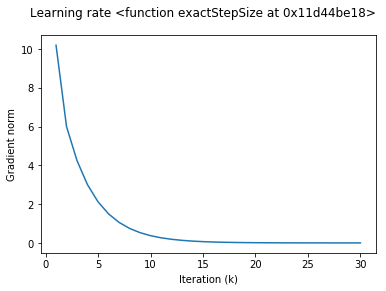

In [8]:
graph(data, lr)

### Step size constante

In [9]:
x = np.array([[3], [5], [7]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = 0.001
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data


Iter                                                 Xn                                         Directions   grad_abs
0      1                           [[2.998], [5.0], [6.99]]                                 [[-2], [0], [-10]]  10.198039
1      2      [[2.996004], [4.999988], [6.980020000000001]]  [[-1.9960000000000004], [-0.011999999999999567...  10.177650
2      3  [[2.9940119800000002], [4.999964048], [6.97005...  [[-1.9920200000000001], [-0.02395199999999953]...  10.157330
3      4  [[2.992023920088], [4.999928191832], [6.960119...  [[-1.9880599120000007], [-0.03585616799999958]...  10.137079
4      5  [[2.9900398004396562], [4.999880479160576], [6...  [[-1.9841196483440005], [-0.04771267142399882]...  10.116896
5      6  [[2.9880596013179375], [4.999820957483454], [6...  [[-1.9801991217187362], [-0.05952167712196754]...  10.096782
6      7  [[2.986083303072785], [4.999749674132082], [6....  [[-1.976298245152421], [-0.07128335137180031],...  10.076735
7      8  [[2.9841108861407712], [4.999666676272201], [6...  [[-1.9724169320134877], [-0.08299785988127972]...  10.056756
8      9  [[2.982142331044762], [4.999572010904411], [6....  [[-1.9685550960093412], [-0.09466536779002066]...  10.036845
9     10  [[2.9801776183935766], [4.99946572486474], [6....  [[-1.9647126511851125], [-0.10628603967140471]...  10.017001
10    11  [[2.9782167288816543], [4.999347864825205], [6...  [[-1.9608895119224137], [-0.11786003953452795]...   9.997224
11    12  [[2.9762596432887163], [4.999218477294379], [6...  [[-1.9570855929381032], [-0.1293875308261203],...   9.977514
12    13  [[2.974306342479433], [4.999077608617947], [6....  [[-1.9533008092830535], [-0.1408686764324658],...   9.957870
13    14  [[2.9723568074030924], [4.998925304979266], [6...  [[-1.9495350763409194], [-0.15230363868132457]...   9.938293
14    15  [[2.9704110190932655], [4.998761612399922], [6...  [[-1.945788309826919], [-0.1636925793438353], ...   9.918782
15    16  [[2.968468958667479], [4.998586576740285], [6....  [[-1.9420604257866092], [-0.17503565963641776]...   9.899336
16    17  [[2.966530607326884], [4.998400243700063], [6....  [[-1.9383513405946724], [-0.18633304022267172]...   9.879956
17    18  [[2.96459594635593], [4.9982026588188475], [6....  [[-1.934660970953705], [-0.19758488121526252],...   9.860642
18    19  [[2.962664957122037], [4.997993867476669], [6....  [[-1.9309892338930128], [-0.20879134217780226]...   9.841392
19    20  [[2.9607376210752694], [4.997773914894543], [6...  [[-1.9273360467674046], [-0.21995258212672741]...   9.822208
20    21  [[2.9588139197480134], [4.997542846135009], [6...  [[-1.923701327255996], [-0.23106875953317463],...   9.803088
21    22  [[2.9568938347546525], [4.997300706102685], [6...  [[-1.9200849933610176], [-0.24214003232482995]...   9.784032
22    23  [[2.954977347791246], [4.997047539544797], [6....  [[-1.9164869634066202], [-0.25316655788780196]...   9.765040
23    24  [[2.9530644406352082], [4.9967833910517285], [...  [[-1.9129071560376953], [-0.264148493068455], ...   9.746113
24    25  [[2.9511550951449896], [4.996508305057553], [6...  [[-1.909345490218688], [-0.2750859941752717], ...   9.727249
25    26  [[2.9492492932597574], [4.996222325840573], [6...  [[-1.9058018852324263], [-0.28597921698067275]...   9.708448
26    27  [[2.9473470169990783], [4.995925497523849], [6...  [[-1.902276260678942], [-0.29682831672286536],...   9.689711
27    28  [[2.945448248462604], [4.995617864075742], [6....  [[-1.8987685364743072], [-0.307633448107655], ...   9.671037
28    29  [[2.9435529698297547], [4.995299469310432], [6...  [[-1.8952786328494664], [-0.31839476531027255]...   9.652425
29    30  [[2.9416611633594054], [4.994970356888454], [6...  [[-1.8918064703490778], [-0.32911242197718327]...   9.633876

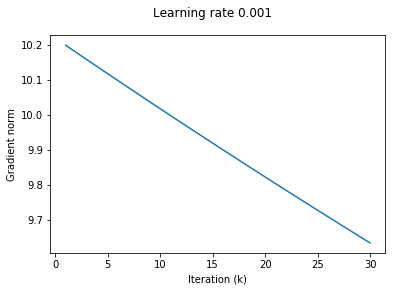

In [10]:
graph(data, lr)

In [11]:
x = np.array([[3], [5], [7]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = 0.01
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data


Iter                                                 Xn                                         Directions   grad_abs
0      1                             [[2.98], [5.0], [6.9]]                                 [[-2], [0], [-10]]  10.198039
1      2         [[2.9604], [4.9988], [6.8020000000000005]]          [[-1.96], [-0.11999999999999922], [-9.8]]   9.994799
2      3                [[2.94118], [4.996448], [6.705948]]  [[-1.9219999999999997], [-0.23519999999999985]...   9.798432
3      4         [[2.92232088], [4.99299032], [6.61179352]]  [[-1.8859120000000003], [-0.34576799999999963]...   9.608688
4      5   [[2.9038043656], [4.9884716576], [6.5194875528]]  [[-1.8516514400000004], [-0.4518662399999993],...   9.425323
5      6  [[2.885612994864], [4.982935143632], [6.428982...  [[-1.8191370736000003], [-0.5536513967999994],...   9.248103
6      7  [[2.86773008640304], [4.9764223958912], [6.340...  [[-1.7882908460960003], [-0.6512747740799991],...   9.076800
7      8  [[2.8501397086338915], [4.968973571031306], [6...  [[-1.7590377769148802], [-0.7448824859894394],...   8.911196
8      9  [[2.8328266501715267], [4.960627414686629], [6...  [[-1.7313058462364772], [-0.8346156344676858],...   8.751078
9     10  [[2.8157763913149623], [4.951421309881533], [6...  [[-1.7050258856564247], [-0.9206104805096045],...   8.596243
10    11  [[2.798975076587478], [4.9413913237857034], [6...  [[-1.6801314727483918], [-1.0029986095829528],...   8.446493
11    12  [[2.7824094882935855], [4.93057225287173], [5....  [[-1.6565588293892528], [-1.081907091397266], ...   8.301636
12    13  [[2.766067021056431], [4.91899766652956], [5.8...  [[-1.6342467237154406], [-1.1574586342170887],...   8.161489
13    14  [[2.7499356573005977], [4.906699949190501], [5...  [[-1.6131363755833021], [-1.2297717339058405],...   8.025875
14    15  [[2.7340039436464907], [4.893710341011699], [5...  [[-1.5931713654106945], [-1.2989608178801975],...   7.894622
15    16  [[2.718260968183678], [4.880058977170211], [5....  [[-1.574297546281282], [-1.3651363841488005], ...   7.767565
16    17  [[2.7026963385917067], [4.865774925814181], [5...  [[-1.5564629591971446], [-1.4284051356030822],...   7.644544
17    18  [[2.6873001610780145], [4.850886224716957], [5...  [[-1.5396177513692324], [-1.488870109722363], ...   7.525405
18    19  [[2.6720630201036237], [4.835419916678459], [5...  [[-1.523714097439072], [-1.5466308038497525], ...   7.410001
19    20  [[2.656975958868336], [4.819402083716558], [5....  [[-1.5087061235287882], [-1.601783296190101], ...   7.298189
20    21  [[2.642030460528135], [4.802857880089798], [5....  [[-1.4945498340201135], [-1.654420362676066], ...   7.189831
21    22  [[2.6272184301184702], [4.7858115641913646], [...  [[-1.4812030409664718], [-1.7046315898433546],...   7.084794
22    23  [[2.6125321771580143], [4.76828652935285], [5....  [[-1.468625296045576], [-1.7525034838514175], ...   6.982952
23    24  [[2.5979643989083825], [4.750305333595039], [5...  [[-1.4567778249631784], [-1.7981195757811879],...   6.884180
24    25  [[2.5835081642661653], [4.7318897283616685], [...  [[-1.4456234642217263], [-1.841560523336998], ...   6.788361
25    26  [[2.569156898264459], [4.713060686270914], [4....  [[-1.435126600170662], [-1.882904209075419], [...   6.695382
26    27  [[2.5549043671618787], [4.693838427918118], [4...  [[-1.4252531102580033], [-1.9222258352796358],...   6.605132
27    28  [[2.540744664097822], [4.67424244776218], [4.8...  [[-1.4159703064056393], [-1.95959801559387], [...   6.517506
28    29  [[2.5266721952934876], [4.654291539126895], [4...  [[-1.4072468804334646], [-1.9950908635284774],...   6.432403
29    30  [[2.512681666778887], [4.634003818347469], [4....  [[-1.3990528514600804], [-2.0287720779425813],...   6.349725

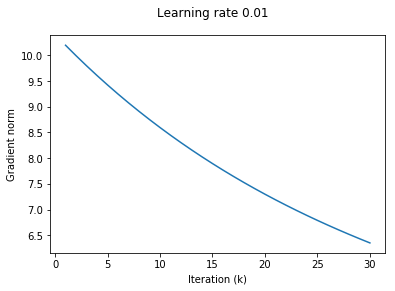

In [12]:
graph(data, lr)

In [13]:
x = np.array([[3], [5], [7]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = 0.1
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data


Iter                                                 Xn                                         Directions   grad_abs
0      1                              [[2.8], [5.0], [6.0]]                                 [[-2], [0], [-10]]  10.198039
1      2              [[2.6399999999999997], [4.88], [5.2]]  [[-1.5999999999999996], [-1.2000000000000002],...   8.246211
2      3           [[2.4999999999999996], [4.688], [4.548]]  [[-1.3999999999999995], [-1.92], [-6.520000000...   6.939510
3      4                     [[2.3688], [4.4552], [4.0072]]  [[-1.3119999999999994], [-2.3279999999999994],...   6.032196
4      5                  [[2.24056], [4.20176], [3.55128]]  [[-1.2824], [-2.534399999999999], [-4.55920000...   5.371595
5      6                 [[2.112624], [3.940592], [3.1612]]  [[-1.2793599999999996], [-2.61168], [-3.900800...   4.865581
6      7    [[1.9841583999999999], [3.679856], [2.8230192]]  [[-1.2846559999999996], [-2.607360000000001], ...   4.459293
7      8         [[1.85531232], [3.42460256], [2.52640096]]  [[-1.2884607999999997], [-2.5525344], [-2.9661...   4.119927
8      9      [[1.726710112], [3.177853376], [2.263581024]]  [[-1.28602208], [-2.467491839999999], [-2.6281...   3.827506
9     10  [[1.5991534271999999], [2.9413118143999997], [...  [[-1.275566848], [-2.3654156159999995], [-2.34...   3.569526
10    11  [[1.4734539232], [2.71582980992], [1.817051306...  [[-1.25699504], [-2.2548200447999993], [-2.115...   3.337912
11    12  [[1.350346119552], [2.5017143709439997], [1.62...  [[-1.23107803648], [-2.1411543897599996], [-1....   3.127278
12    13  [[1.2304483327359999], [2.2989285113599998], [...  [[-1.19897786816], [-2.0278585958399997], [-1....   2.933910
13    14  [[1.1142515173247998], [2.1072227081907196], [...  [[-1.161968154112], [-1.9170580316928], [-1.60...   2.755169
14    15  [[1.0021234846789118], [1.9262206560619517], [...  [[-1.12128032645888], [-1.8100205212876794], [...   2.589119
15    16  [[0.8943208533493245], [1.7554749706208765], [...  [[-1.0780263132958718], [-1.7074568544107518],...   2.434295
16    17  [[0.7910041797415472], [1.5945031462349923], [...  [[-1.0331667360777725], [-1.6097182438588415],...   2.289555
17    18  [[0.692253658416737], [1.4428105521910444], [0...  [[-0.9875052132481021], [-1.51692594043948], [...   2.153981
18    19  [[0.598083981952494], [1.2999049328399757], [0...  [[-0.9416967646424297], [-1.4290561935106867],...   2.026816
19    20  [[0.5084576788459928], [1.1653053501855135], [...  [[-0.8962630310650124], [-1.345995826544621], ...   1.907416
20    21  [[0.4232966780953456], [1.0385475019360368], [...  [[-0.8516100075064721], [-1.2675784824947676],...   1.795226
21    22  [[0.3424920926698802], [0.9191866859826405], [...  [[-0.8080458542546544], [-1.1936081595339636],...   1.689754
22    23  [[0.2659123427341682], [0.8067992463718819], [...  [[-0.7657974993571198], [-1.1238743961075854],...   1.590559
23    24  [[0.19340979882452275], [0.700983048885774], [...  [[-0.7250254390964544], [-1.0581619748610795],...   1.497243
24    25  [[0.12482614394819559], [0.6013573454666716], ...  [[-0.6858365487632715], [-0.9962570341910241],...   1.409439
25    26  [[0.05999664970522364], [0.5075622624374947], ...  [[-0.6482949424297195], [-0.9379508302917692],...   1.326810
26    27  [[-0.0012464539920716278], [0.4192580657106551...  [[-0.6124310369729526], [-0.8830419672683958],...   1.249042
27    28  [[-0.05907135662259179], [0.33612430242580144]...  [[-0.5782490263052016], [-0.8313376328485365],...   1.175844
28    29  [[-0.11364465505549329], [0.2578588831406762],...  [[-0.545732984329015], [-0.7826541928512528], ...   1.106944
29    30  [[-0.16512983573032702], [0.18417714552108497]...  [[-0.5148518067483372], [-0.736817376195912], ...   1.042087

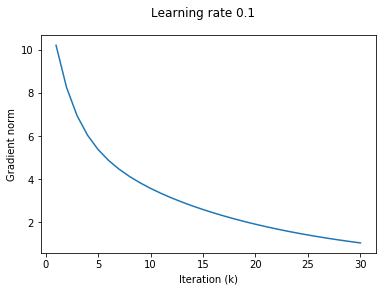

In [14]:
graph(data, lr)

In [15]:
x = np.array([[3], [5], [7]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = 0.5
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data


Iter                                                 Xn                                        Directions   grad_abs
0      1                              [[2.0], [5.0], [2.0]]                                [[-2], [0], [-10]]  10.198039
1      2                              [[2.0], [2.0], [2.0]]                          [[-0.0], [-6.0], [-0.0]]   6.000000
2      3                              [[0.5], [2.0], [0.5]]                          [[-3.0], [-0.0], [-3.0]]   4.242641
3      4                              [[0.5], [0.5], [0.5]]                          [[-0.0], [-3.0], [-0.0]]   3.000000
4      5                          [[-0.25], [0.5], [-0.25]]                          [[-1.5], [-0.0], [-1.5]]   2.121320
5      6                        [[-0.25], [-0.25], [-0.25]]                          [[-0.0], [-1.5], [-0.0]]   1.500000
6      7                      [[-0.625], [-0.25], [-0.625]]                        [[-0.75], [-0.0], [-0.75]]   1.060660
7      8                     [[-0.625], [-0.625], [-0.625]]                         [[-0.0], [-0.75], [-0.0]]   0.750000
8      9                   [[-0.8125], [-0.625], [-0.8125]]                      [[-0.375], [-0.0], [-0.375]]   0.530330
9     10                  [[-0.8125], [-0.8125], [-0.8125]]                        [[-0.0], [-0.375], [-0.0]]   0.375000
10    11                [[-0.90625], [-0.8125], [-0.90625]]                    [[-0.1875], [-0.0], [-0.1875]]   0.265165
11    12               [[-0.90625], [-0.90625], [-0.90625]]                       [[-0.0], [-0.1875], [-0.0]]   0.187500
12    13             [[-0.953125], [-0.90625], [-0.953125]]                  [[-0.09375], [-0.0], [-0.09375]]   0.132583
13    14            [[-0.953125], [-0.953125], [-0.953125]]                      [[-0.0], [-0.09375], [-0.0]]   0.093750
14    15          [[-0.9765625], [-0.953125], [-0.9765625]]                [[-0.046875], [-0.0], [-0.046875]]   0.066291
15    16         [[-0.9765625], [-0.9765625], [-0.9765625]]                     [[-0.0], [-0.046875], [-0.0]]   0.046875
16    17       [[-0.98828125], [-0.9765625], [-0.98828125]]              [[-0.0234375], [-0.0], [-0.0234375]]   0.033146
17    18      [[-0.98828125], [-0.98828125], [-0.98828125]]                    [[-0.0], [-0.0234375], [-0.0]]   0.023438
18    19    [[-0.994140625], [-0.98828125], [-0.994140625]]            [[-0.01171875], [-0.0], [-0.01171875]]   0.016573
19    20   [[-0.994140625], [-0.994140625], [-0.994140625]]                   [[-0.0], [-0.01171875], [-0.0]]   0.011719
20    21  [[-0.9970703125], [-0.994140625], [-0.99707031...          [[-0.005859375], [-0.0], [-0.005859375]]   0.008286
21    22  [[-0.9970703125], [-0.9970703125], [-0.9970703...                  [[-0.0], [-0.005859375], [-0.0]]   0.005859
22    23  [[-0.99853515625], [-0.9970703125], [-0.998535...        [[-0.0029296875], [-0.0], [-0.0029296875]]   0.004143
23    24  [[-0.99853515625], [-0.99853515625], [-0.99853...                 [[-0.0], [-0.0029296875], [-0.0]]   0.002930
24    25  [[-0.999267578125], [-0.99853515625], [-0.9992...      [[-0.00146484375], [-0.0], [-0.00146484375]]   0.002072
25    26  [[-0.999267578125], [-0.999267578125], [-0.999...                [[-0.0], [-0.00146484375], [-0.0]]   0.001465
26    27  [[-0.9996337890625], [-0.999267578125], [-0.99...    [[-0.000732421875], [-0.0], [-0.000732421875]]   0.001036
27    28  [[-0.9996337890625], [-0.9996337890625], [-0.9...               [[-0.0], [-0.000732421875], [-0.0]]   0.000732
28    29  [[-0.99981689453125], [-0.9996337890625], [-0....  [[-0.0003662109375], [-0.0], [-0.0003662109375]]   0.000518
29    30  [[-0.99981689453125], [-0.99981689453125], [-0...              [[-0.0], [-0.0003662109375], [-0.0]]   0.000366

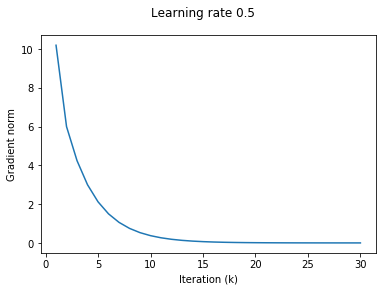

In [16]:
graph(data, lr)

In [17]:
x = np.array([[3], [5], [7]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = 1
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data


Iter                                                 Xn                                         Directions      grad_abs
0      1                                   [[1], [5], [-3]]                                 [[-2], [0], [-10]]  1.019804e+01
1      2                                   [[3], [-7], [7]]                                 [[2], [-12], [10]]  1.574802e+01
2      3                               [[-11], [17], [-15]]                               [[-14], [24], [-22]]  3.544009e+01
3      4                                [[27], [-43], [31]]                                [[38], [-60], [46]]  8.461678e+01
4      5                              [[-71], [101], [-75]]                             [[-98], [144], [-106]]  2.039019e+02
5      6                             [[171], [-247], [175]]                             [[242], [-348], [250]]  4.921057e+02
6      7                            [[-419], [593], [-423]]                            [[-590], [840], [-598]]  1.187983e+03
7      8                          [[1011], [-1435], [1015]]                          [[1430], [-2028], [1438]]  2.868018e+03
8      9                         [[-2447], [3461], [-2451]]                         [[-3458], [4896], [-3466]]  6.923997e+03
9     10                          [[5907], [-8359], [5911]]                         [[8354], [-11820], [8362]]  1.671600e+04
10    11                      [[-14267], [20177], [-14271]]                      [[-20174], [28536], [-20182]]  4.035600e+04
11    12                       [[34443], [-48715], [34447]]                       [[48710], [-68892], [48718]]  9.742800e+04
12    13                     [[-83159], [117605], [-83163]]                   [[-117602], [166320], [-117610]]  2.352120e+05
13    14                    [[200763], [-283927], [200767]]                    [[283922], [-401532], [283930]]  5.678520e+05
14    15                   [[-484691], [685457], [-484695]]                   [[-685454], [969384], [-685462]]  1.370916e+06
15    16                 [[1170147], [-1654843], [1170151]]                 [[1654838], [-2340300], [1654846]]  3.309684e+06
16    17                [[-2824991], [3995141], [-2824995]]                [[-3995138], [5649984], [-3995146]]  7.990284e+06
17    18                 [[6820131], [-9645127], [6820135]]                [[9645122], [-13640268], [9645130]]  1.929025e+07
18    19             [[-16465259], [23285393], [-16465263]]             [[-23285390], [32930520], [-23285398]]  4.657079e+07
19    20              [[39750651], [-56215915], [39750655]]              [[56215910], [-79501308], [56215918]]  1.124318e+08
20    21            [[-95966567], [135717221], [-95966571]]          [[-135717218], [191933136], [-135717226]]  2.714344e+08
21    22           [[231683787], [-327650359], [231683791]]           [[327650354], [-463367580], [327650362]]  6.553007e+08
22    23          [[-559334147], [791017937], [-559334151]]         [[-791017934], [1118668296], [-791017942]]  1.582036e+09
23    24        [[1350352083], [-1909686235], [1350352087]]        [[1909686230], [-2700704172], [1909686238]]  3.819372e+09
24    25       [[-3260038319], [4610390405], [-3260038323]]       [[-4610390402], [6520076640], [-4610390410]]  9.220781e+09
25    26       [[7870428723], [-11130467047], [7870428727]]     [[11130467042], [-15740857452], [11130467050]]  2.226093e+10
26    27    [[-19000895771], [26871324497], [-19000895775]]    [[-26871324494], [38001791544], [-26871324502]]  5.374265e+10
27    28     [[45872220267], [-64873116043], [45872220271]]     [[64873116038], [-91744440540], [64873116046]]  1.297462e+11
28    29  [[-110745336311], [156617556581], [-1107453363...  [[-156617556578], [221490672624], [-1566175565...  3.132351e+11
29    30  [[267362892891], [-378108229207], [267362892895]]  [[378108229202], [-534725785788], [378108229210]]  7.562165e+11

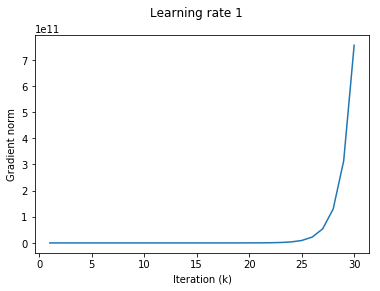

In [18]:
graph(data, lr)

### Step size variable

In [19]:
x = np.array([[3], [5], [7]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = lambda *k : 1/k[0] if k[0] >0 else 1/0.1
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data


Iter                                                 Xn                                         Directions    grad_abs
0      1                          [[-17.0], [5.0], [-93.0]]                                 [[-2], [0], [-10]]   10.198039
1      2                         [[21.0], [-115.0], [97.0]]                        [[38.0], [-120.0], [190.0]]  227.912264
2      3                         [[-58.0], [59.0], [-58.0]]                      [[-158.0], [348.0], [-310.0]]  492.105680
3      4                            [[0.0], [-19.0], [0.0]]                       [[174.0], [-234.0], [174.0]]  339.570317
4      5                           [[-5.0], [-9.5], [-5.0]]                         [[-20.0], [38.0], [-20.0]]   47.370877
5      6                           [[-5.1], [-7.7], [-5.1]]                            [[-0.5], [9.0], [-0.5]]    9.027735
6      7           [[-4.85], [-6.833333333333333], [-4.85]]  [[1.4999999999999991], [5.200000000000001], [1...    5.616048
7      8  [[-4.583333333333333], [-6.266666666666667], [...  [[1.8666666666666663], [3.966666666666667], [1...    4.764801
8      9  [[-4.345833333333333], [-5.845833333333333], [...  [[1.8999999999999995], [3.366666666666667], [1...    4.307487
9     10  [[-4.140740740740741], [-5.5125], [-4.14074074...  [[1.8458333333333332], [3.0], [1.8458333333333...    3.976707
10    11  [[-3.963842592592593], [-5.238148148148149], [...  [[1.7689814814814815], [2.7435185185185187], [...    3.712881
11    12  [[-3.810248316498317], [-5.006456228956229], [...  [[1.689537037037037], [2.548611111111111], [1....    3.493492
12    13  [[-3.67574494949495], [-4.807088243546577], [-...  [[1.6140404040404048], [2.3924158249158243], [...    3.306646
13    14  [[-3.556944822153156], [-4.633035429077096], [...  [[1.5444016554433233], [2.2626865881032536], [...    3.144854
14    15  [[-3.4511695210653546], [-4.479308199516534], ...  [[1.4808542152292157], [2.1521812138478804], [...    3.002956
15    16  [[-3.3563007982244097], [-4.34222304238971], [...  [[1.4230308426141756], [2.056277356902358], [1...    2.877205
16    17  [[-3.2706521385957155], [-4.218982761869047], ...  [[1.3703785540591094], [1.9718444883306003], [...    2.764787
17    18  [[-3.19286852004734], [-4.107414453248656], [-...  [[1.3223215153223835], [1.896661246546664], [1...    2.663530
18    19  [[-3.1218505985558944], [-4.005798238448509], ...  [[1.2783225868460244], [1.8290918664026314], [...    2.571730
19    20  [[-3.056697811257827], [-3.912751118459813], [...  [[1.2379029586632795], [1.7678952797852294], [...    2.488024
20    21  [[-2.996665586055035], [-3.8271457877396147], ...  [[1.2006445040558407], [1.7121066144039725], [...    2.411307
21    22  [[-2.9411329487040607], [-3.7480524351982263],...  [[1.166185384370455], [1.6609604033691596], [1...    2.340676
22    23  [[-2.8895777913308835], [-3.6746961182442113],...  [[1.1342134622098952], [1.6138389729883311], [...    2.275381
23    24  [[-2.841557814617077], [-3.6064249593821827], ...  [[1.1044594644175558], [1.5702366538266554], [...    2.214792
24    25  [[-2.7966957033732447], [-3.5426860306517574],...  [[1.076690669851971], [1.5297342895302117], [1...    2.158382
25    26  [[-2.7546674883294555], [-3.4830068044694764],...  [[1.050705376094732], [1.4919806545570253], [1...    2.105699
26    27  [[-2.7151933278606313], [-3.4269807032279362],...  [[1.0263281721894346], [1.4566786322800418], [...    2.056359
27    28  [[-2.6780301444349526], [-3.3742557124599877],...  [[1.0034059524933263], [1.42357475073461], [1....    2.010028
28    29  [[-2.6429656952774554], [-3.3245253147439136],...  [[0.9818045764099175], [1.3924511360500702], [...    1.966418
29    30  [[-2.6098137616288004], [-3.2775212030565717],...  [[0.9614060758109972], [1.3631192389329163], [...    1.925279

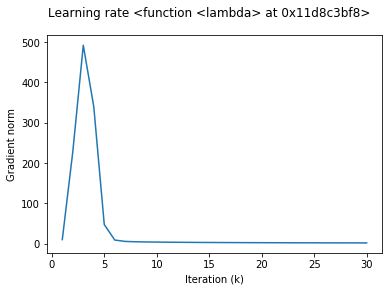

In [20]:
graph(data, lr)

## Valores 2


### Step size exacto

In [21]:
x = np.array([[-1], [2], [-3]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = exactStepSize
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data


Iter                                                 Xn                                         Directions      grad_abs
0      1  [[-0.09405940594059414], [-0.41584158415841577...                                   [[3], [-8], [7]]  1.104536e+01
1      2  [[-0.46480737182629156], [-0.46069012841878243...  [[-1.2277227722772275], [-0.14851485148514865]...  1.287014e+00
2      3  [[-0.7528468138367708], [-0.6352949327680975],...  [[-0.5310753847661993], [-0.3219292226252329],...  6.284552e-01
3      4  [[-0.8532156349466526], [-0.7967826886730334],...  [[-0.12960130509455592], [-0.2085211691303822]...  3.060738e-01
4      5  [[-1.0014722262416265], [-1.0059249116973188],...  [[-0.09035141877972808], [-0.12745670470322712...  1.677806e-01
5      6  [[-1.006218859850737], [-0.9387204727780022], ...  [[-0.002980459214065867], [0.0421983463856902]...  8.141909e-02
6      7  [[-0.9810044539134093], [-1.0097788965415253],...  [[0.0737172469234717], [-0.20774756238907122],...  3.108861e-01
7      8  [[-0.9956608813383203], [-0.9991736879538472],...  [[-0.047769988714706724], [0.03456576966972369...  5.899168e-02
8      9  [[-0.9982915213983138], [-0.9997950000596906],...  [[-0.007851925277206573], [-0.0018544902068124...  1.277755e-02
9     10  [[-0.9998608444776217], [-0.9997573409054172],...  [[-0.0032119572630630033], [7.707756018127121e...  4.163348e-03
10    11  [[-0.9998786258453896], [-0.9998939382247294],...  [[-3.565195017385392e-05], [-0.000273879989749...  2.930933e-04
11    12  [[-0.9999356223482124], [-0.9998812378786406],...  [[-0.00013668653395026986], [3.045741757590203...  1.954551e-04
12    13  [[-0.9999397257105463], [-0.9999259115733657],...  [[-9.993182215728424e-06], [-0.000108796722129...  1.097057e-04
13    14  [[-0.9999680609378396], [-0.9999427645996254],...  [[-4.6460152273053446e-05], [-2.76332410599211...  7.127247e-05
14    15  [[-0.9999747764581894], [-0.999993910608527], ...  [[-6.6427239461264165e-06], [-5.05915849233762...  5.145667e-05
15    16  [[-1.00000450235868], [-0.9999682662053667], [...  [[-4.435769214816698e-05], [3.826718524690964e...  7.348054e-05
16    17  [[-0.9999919962020141], [-0.9999905140791705],...  [[4.073851199359879e-05], [-7.247192706705263e...  9.258170e-05
17    18  [[-0.9999939269584849], [-0.9999913916073394],...  [[-6.521675142368011e-06], [-2.964099166558043...  9.687838e-06
18    19  [[-0.9999969349109213], [-0.999995702965866], ...  [[-3.5376903696482387e-06], [-5.07064252575073...  7.123396e-06
19    20  [[-1.000000063605124], [-0.9999999082490267], ...  [[-1.8331440233554375e-06], [-2.46393197711469...  3.576519e-06
20    21  [[-0.9999996909756064], [-1.000000436848943], ...  [[2.1896122137654572e-07], [-3.106111507999998...  4.384961e-07

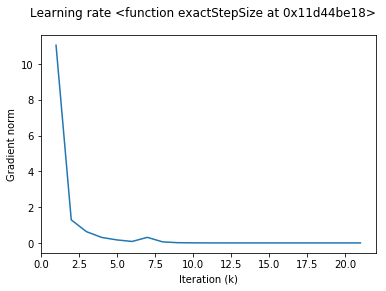

In [22]:
graph(data, lr)

### Step constante

In [23]:
x = np.array([[-1], [2], [-3]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = lr = 0.001
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data


Iter                                                 Xn                                         Directions   grad_abs
0      1                      [[-0.997], [1.992], [-2.993]]                                   [[3], [-8], [7]]  11.045361
1      2   [[-0.994014], [1.984026], [-2.9860219999999997]]          [[2.9859999999999998], [-7.974], [6.978]]  11.008785
2      3  [[-0.991041946], [1.976077912], [-2.9790659299...    [[2.972054], [-7.948088], [6.9560699999999995]]  10.972334
3      4  [[-0.988083784196], [1.9681556483], [-2.972131...  [[2.958161804], [-7.9222637], [6.9342097719999...  10.936007
4      5  [[-0.9851394609793079], [1.960259121498976], [...  [[2.944323216692], [-7.896526801023999], [6.91...  10.899803
5      6  [[-0.9822089229358504], [1.9523882444938594], ...  [[2.9305380434575916], [-7.870877005116504], [...  10.863723
6      7  [[-0.9792921168454848], [1.9445429304785204], ...  [[2.91680609036556], [-7.845314015339035], [6....  10.827765
7      8  [[-0.9763889896813153], [1.9367230929427537], ...  [[2.90312716416949], [-7.819837535766667], [6....  10.791930
8      9  [[-0.9734994886090099], [1.928928645671269], [...  [[2.889501072305384], [-7.794447271484557], [6...  10.756216
9     10  [[-0.9706235609861207], [1.9211595027426847], ...  [[2.875927622889289], [-7.769142928584504], [6...  10.720624
10    11  [[-0.9677611543614058], [1.9134155785285232], ...  [[2.862406624714926], [-7.743924214161509], [6...  10.685153
11    12  [[-0.9649122164741544], [1.9056967876922128], ...  [[2.848937887251335], [-7.7187908363103475], [...  10.649802
12    13  [[-0.9620766952535138], [1.8980030451880907], ...  [[2.835521220640522], [-7.693742504122165], [6...  10.614572
13    14  [[-0.9592545388178186], [1.8903342662604097], ...  [[2.8221564356951183], [-7.6687789276810605], ...  10.579462
14    15  [[-0.9564456954739226], [1.8826903664423489], ...  [[2.808843343896047], [-7.643899818060712], [6...  10.544471
15    16  [[-0.9536501137165324], [1.8750712615550278], ...  [[2.795581757390194], [-7.61910488732099], [6....  10.509599
16    17  [[-0.9508677422275443], [1.8674768677065232], ...  [[2.7823714889880926], [-7.594393848504589], [...  10.474846
17    18  [[-0.9480985298753827], [1.8599071012908894], ...  [[2.769212352161612], [-7.569766415633682], [6...  10.440210
18    19  [[-0.945342425714341], [1.852361878987183], [-...  [[2.756104161041655], [-7.545222303706559], [6...  10.405693
19    20  [[-0.9425993789839252], [1.8448411177584887], ...  [[2.743046730415865], [-7.520761228694315], [6...  10.371293
20    21  [[-0.9398693391081989], [1.8373447348509513], ...  [[2.730039875726339], [-7.496382907537512], [6...  10.337010
21    22  [[-0.9371522556951316], [1.8298726477928084], ...  [[2.717083413067349], [-7.472087058142879], [6...  10.302844
22    23  [[-0.9344480785359486], [1.8224247743934285], ...  [[2.7041771591830717], [-7.44787339938001], [6...  10.268794
23    24  [[-0.9317567576044833], [1.8150010327423505], ...  [[2.6913209314653255], [-7.4237416510780765], ...  10.234859
24    25  [[-0.929078243056532], [1.8076013412083278], [...  [[2.678514547951317], [-7.399691534022551], [6...  10.201040
25    26  [[-0.9264124852292106], [1.8002256184383758], ...  [[2.665757827321392], [-7.375722769951945], [6...  10.167336
26    27  [[-0.9237594346403138], [1.7928737833568213], ...  [[2.653050588896797], [-7.351835081554554], [6...  10.133747
27    28  [[-0.9211190419876764], [1.785545755164356], [...  [[2.6403926526374493], [-7.3280281924652115], ...  10.100272
28    29  [[-0.9184912581485366], [1.778241453337094], [...  [[2.627783839139709], [-7.304301827262065], [6...  10.066911
29    30  [[-0.9158760341789024], [1.7709607976256307], ...  [[2.615223969634167], [-7.2806557114633454], [...  10.033663

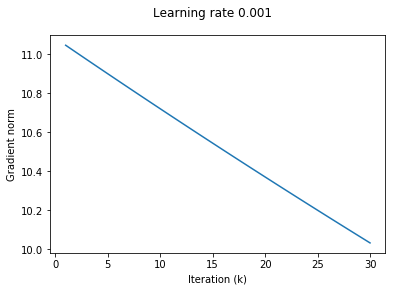

In [24]:
graph(data, lr)

In [25]:
x = np.array([[-1], [2], [-3]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = lr = 0.01
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data


Iter                                                 Xn                                         Directions   grad_abs
0      1                         [[-0.97], [1.92], [-2.93]]                                   [[3], [-8], [7]]  11.045361
1      2                   [[-0.9414], [1.8426], [-2.8622]]                          [[2.86], [-7.74], [6.78]]  10.679682
2      3              [[-0.914146], [1.767712], [-2.79653]]         [[2.7254], [-7.4887999999999995], [6.567]]  10.326443
3      4  [[-0.88818596], [1.6952509999999998], [-2.7329...  [[2.5960039999999998], [-7.2461], [6.360772000...   9.985220
4      5  [[-0.8634697308], [1.6251348975999997], [-2.67...  [[2.4716229199999997], [-7.01161024], [6.16109...   9.655604
5      6  [[-0.839948987208], [1.5572843890959998], [-2....  [[2.3520743591999995], [-6.7850508504], [5.967...   9.337200
6      7  [[-0.81757716357288], [1.4916228739526398], [-...  [[2.237182363512], [-6.566151514335999], [5.78...   9.029624
7      8  [[-0.7963093915618961], [1.428076362537195], [...  [[2.1267772010984], [-6.35465114154448], [5.59...   8.732508
8      9  [[-0.7761024401052862], [1.3665733870035774], ...  [[2.020695145660987], [-6.150297553361753], [5...   8.445496
9     10  [[-0.7569146574331447], [1.307044915218797], [...  [[1.91877826721415], [-5.952847178478027], [5....   8.168243
10    11  [[-0.7387059151322938], [1.2494242676280072], ...  [[1.8208742300850864], [-5.762064759078977], [...   7.900416
11    12  [[-0.7214375541533679], [1.1936470369578052], ...  [[1.726836097892595], [-5.5777230670201945], [...   7.641695
12    13  [[-0.7050723327007224], [1.1396510106608857], ...  [[1.636522145264541], [-5.399602629691946], [4...   7.391769
13    14  [[-0.6895743759400992], [1.0873760960084515], ...  [[1.5497956760623306], [-5.227491465243425], [...   7.150339
14    15  [[-0.6749091274612127], [1.0367642477399825], ...  [[1.4665248478886497], [-5.0611848268469055], ...   6.917115
15    16  [[-0.6610433024345886], [0.9877593981830506], ...  [[1.386582502662408], [-4.900484955693198], [4...   6.691817
16    17  [[-0.6479448424040664], [0.9403073897588479], ...  [[1.309846003052228], [-4.745200842420271], [4...   6.474177
17    18  [[-0.6355828716583966], [0.8943559097919767], ...  [[1.2361970745669808], [-4.595147996687121], [...   6.263932
18    19  [[-0.6239276551273089], [0.8498544275458285], ...  [[1.1655216531087698], [-4.4501482246148125], ...   6.060831
19    20  [[-0.6129505577493044], [0.806754133407568], [...  [[1.0977097378004461], [-4.31002941382606], [3...   5.864631
20    21  [[-0.6026240052602426], [0.7650078801493286], ...  [[1.0326552489061767], [-4.174625325823934], [...   5.675097
21    22  [[-0.5929214463535445], [0.7245701261947374], ...  [[0.9702558906698138], [-4.043775395459128], [...   5.492002
22    23  [[-0.5838173161645263], [0.6853968808222999], ...  [[0.9104130189018265], [-3.9173245372437497], ...   5.315127
23    24  [[-0.5752870010330128], [0.6474456512395209], ...  [[0.8530315131513524], [-3.7951229582778945], ...   5.144260
24    25  [[-0.5673068044999573], [0.6106753914638887], ...  [[0.7980196533055466], [-3.6770259775632246], ...   4.979196
25    26  [[-0.5598539144953193], [0.5750464529490339], ...  [[0.7452890004638033], [-3.5628938514854855], ...   4.819739
26    27  [[-0.5529063716759226], [0.5405205368964805], ...  [[0.6947542819396726], [-3.4525916052553445], ...   4.665697
27    28  [[-0.5464430388734394], [0.5070606481954394], ...  [[0.6463332802483257], [-3.3459888701041116], ...   4.516886
28    29  [[-0.5404435716140162], [0.47463105093506064],...  [[0.5999467259423181], [-3.242959726037877], [...   4.373129
29    30  [[-0.5348883896723853], [0.4431972254354579], ...  [[0.5555181941630931], [-3.1433825499602706], ...   4.234252

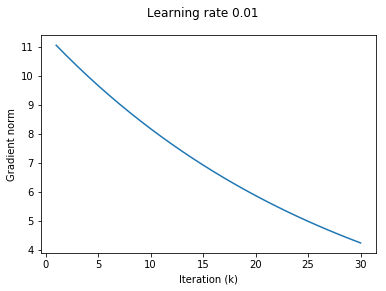

In [26]:
graph(data, lr)

In [27]:
x = np.array([[-1], [2], [-3]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = lr = 0.1
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data

Iter                                                 Xn                                         Directions   grad_abs
0      1                            [[-0.7], [1.2], [-2.3]]                                   [[3], [-8], [7]]  11.045361
1      2           [[-0.54], [0.66], [-1.8199999999999998]]  [[1.5999999999999996], [-5.3999999999999995], ...   7.400000
2      3  [[-0.466], [0.29200000000000004], [-1.48999999...  [[0.7400000000000002], [-3.6799999999999997], ...   4.998000
3      4     [[-0.4436], [0.038000000000000034], [-1.2628]]  [[0.2240000000000002], [-2.54], [2.27199999999...   3.415225
4      5  [[-0.45108], [-0.14023999999999998], [-1.10643...      [[-0.07479999999999998], [-1.7824], [1.5636]]   2.372212
5      6  [[-0.474888], [-0.26794399999999996], [-0.9991...  [[-0.23808000000000007], [-1.27704], [1.072639...   1.684657
6      7  [[-0.5067048], [-0.36176159999999996], [-0.926...  [[-0.318168], [-0.9381759999999999], [0.730407...   1.230813
7      8  [[-0.5415399999999999], [-0.43269327999999996]...  [[-0.348352], [-0.7093167999999999], [0.490508...   0.930096
8      9  [[-0.576501328], [-0.48801705599999995], [-0.8...  [[-0.34961328000000014], [-0.5532377599999998]...   0.729142
9     10  [[-0.610002768], [-0.5325574559999999], [-0.82...  [[-0.33501439999999993], [-0.4454039999999999]...   0.592761
10    11  [[-0.64125796], [-0.5695213548799999], [-0.813...  [[-0.31255192], [-0.3696389888], [0.1169448095...   0.497994
11    12  [[-0.669958503488], [-0.6010485450879999], [-0...  [[-0.28700543487999985], [-0.3152719020800001]...   0.430083
12    13  [[-0.6960716572992], [-0.6285744321151999], [-...  [[-0.26113153811199985], [-0.27525887027200013...   0.379666
13    14  [[-0.7197147690508799], [-0.6530689934297599],...  [[-0.23643111751680002], [-0.24494561314560004...   0.340839
14    15  [[-0.7410787145836799], [-0.6751942415761919],...  [[-0.213639455328], [-0.22125248146432008], [-...   0.309866
15    16  [[-0.7603823958245631], [-0.6954080105954559],...  [[-0.19303681240883208], [-0.20213769019264005...   0.284356
16    17  [[-0.7778467177191961], [-0.7140323871754904],...  [[-0.17464321894632961], [-0.18624376580034574...   0.262750
17    18  [[-0.7936806128929059], [-0.731298852911602], ...  [[-0.15833895173709822], [-0.17266465736111625...   0.244018
18    19  [[-0.8080743756054849], [-0.7473780846097592],...  [[-0.14393762712579017], [-0.1607923169815717]...   0.227462
19    20  [[-0.8211973089453638], [-0.7623996465704215],...  [[-0.1312293333987894], [-0.15021561960662255]...   0.212604
20    21  [[-0.8331978118133332], [-0.7764650220546236],...  [[-0.12000502867969387], [-0.14065375484202158...   0.199108
21    22  [[-0.844204751656129], [-0.7896562544137365], ...  [[-0.11006939842795727], [-0.1319123235911286]...   0.186737
22    23  [[-0.8543294267662769], [-0.8020416933881118],...  [[-0.10124675110147863], [-0.1238543897437524]...   0.175318
23    24  [[-0.8636677107518327], [-0.8136798316844622],...  [[-0.09338283985555806], [-0.11638138296350409...   0.164721
24    25  [[-0.8723021517699123], [-0.8246218807945103],...  [[-0.08634441018079686], [-0.10942049110048013...   0.154850
25    26  [[-0.8803039094953808], [-0.8349135136268498],...  [[-0.08001757725468561], [-0.10291632832339559...   0.145628
26    27  [[-0.8877344789589896], [-0.8445960557103633],...  [[-0.07430569463608816], [-0.09682542083513523...   0.136994
27    28  [[-0.894647188738228], [-0.8537073106879345], ...  [[-0.06912709779238413], [-0.09111254977571115...   0.128899
28    29  [[-0.9010884820593759], [-0.8622821425602699],...  [[-0.06441293321147845], [-0.08574831872335398...   0.121301
29    30  [[-0.9070989999035277], [-0.8703528954699125],...  [[-0.06010517844151819], [-0.08070752909642542...   0.114163

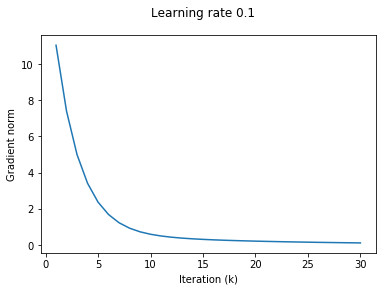

In [28]:
graph(data, lr)

In [29]:
x = np.array([[-1], [2], [-3]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = lr = 0.5
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data

Iter                                                 Xn                                         Directions   grad_abs
0      1                             [[0.5], [-2.0], [0.5]]                                   [[3], [-8], [7]]  11.045361
1      2                            [[-1.5], [0.5], [-1.5]]                            [[-4.0], [5.0], [-4.0]]   7.549834
2      3                         [[-0.25], [-1.5], [-0.25]]                             [[2.5], [-4.0], [2.5]]   5.338539
3      4                        [[-1.25], [-0.25], [-1.25]]                            [[-2.0], [2.5], [-2.0]]   3.774917
4      5                      [[-0.625], [-1.25], [-0.625]]                           [[1.25], [-2.0], [1.25]]   2.669270
5      6                     [[-1.125], [-0.625], [-1.125]]                           [[-1.0], [1.25], [-1.0]]   1.887459
6      7                   [[-0.8125], [-1.125], [-0.8125]]                         [[0.625], [-1.0], [0.625]]   1.334635
7      8                  [[-1.0625], [-0.8125], [-1.0625]]                          [[-0.5], [0.625], [-0.5]]   0.943729
8      9                [[-0.90625], [-1.0625], [-0.90625]]                       [[0.3125], [-0.5], [0.3125]]   0.667317
9     10               [[-1.03125], [-0.90625], [-1.03125]]                       [[-0.25], [0.3125], [-0.25]]   0.471865
10    11             [[-0.953125], [-1.03125], [-0.953125]]                    [[0.15625], [-0.25], [0.15625]]   0.333659
11    12            [[-1.015625], [-0.953125], [-1.015625]]                    [[-0.125], [0.15625], [-0.125]]   0.235932
12    13          [[-0.9765625], [-1.015625], [-0.9765625]]                 [[0.078125], [-0.125], [0.078125]]   0.166829
13    14         [[-1.0078125], [-0.9765625], [-1.0078125]]                 [[-0.0625], [0.078125], [-0.0625]]   0.117966
14    15       [[-0.98828125], [-1.0078125], [-0.98828125]]              [[0.0390625], [-0.0625], [0.0390625]]   0.083415
15    16      [[-1.00390625], [-0.98828125], [-1.00390625]]              [[-0.03125], [0.0390625], [-0.03125]]   0.058983
16    17    [[-0.994140625], [-1.00390625], [-0.994140625]]           [[0.01953125], [-0.03125], [0.01953125]]   0.041707
17    18   [[-1.001953125], [-0.994140625], [-1.001953125]]           [[-0.015625], [0.01953125], [-0.015625]]   0.029492
18    19  [[-0.9970703125], [-1.001953125], [-0.99707031...        [[0.009765625], [-0.015625], [0.009765625]]   0.020854
19    20  [[-1.0009765625], [-0.9970703125], [-1.0009765...        [[-0.0078125], [0.009765625], [-0.0078125]]   0.014746
20    21  [[-0.99853515625], [-1.0009765625], [-0.998535...     [[0.0048828125], [-0.0078125], [0.0048828125]]   0.010427
21    22  [[-1.00048828125], [-0.99853515625], [-1.00048...     [[-0.00390625], [0.0048828125], [-0.00390625]]   0.007373
22    23  [[-0.999267578125], [-1.00048828125], [-0.9992...  [[0.00244140625], [-0.00390625], [0.00244140625]]   0.005213
23    24  [[-1.000244140625], [-0.999267578125], [-1.000...  [[-0.001953125], [0.00244140625], [-0.001953125]]   0.003686
24    25  [[-0.9996337890625], [-1.000244140625], [-0.99...  [[0.001220703125], [-0.001953125], [0.00122070...   0.002607
25    26  [[-1.0001220703125], [-0.9996337890625], [-1.0...  [[-0.0009765625], [0.001220703125], [-0.000976...   0.001843
26    27  [[-0.99981689453125], [-1.0001220703125], [-0....  [[0.0006103515625], [-0.0009765625], [0.000610...   0.001303
27    28  [[-1.00006103515625], [-0.99981689453125], [-1...  [[-0.00048828125], [0.0006103515625], [-0.0004...   0.000922
28    29  [[-0.999908447265625], [-1.00006103515625], [-...  [[0.00030517578125], [-0.00048828125], [0.0003...   0.000652
29    30  [[-1.000030517578125], [-0.999908447265625], [...  [[-0.000244140625], [0.00030517578125], [-0.00...   0.000461

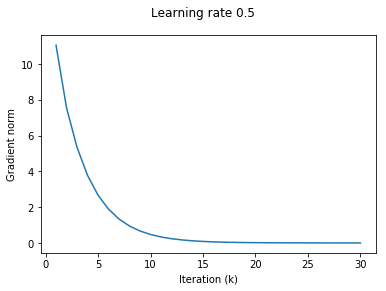

In [30]:
graph(data, lr)

In [31]:
x = np.array([[-1], [2], [-3]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = lr = 1
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data

Iter                                                 Xn                                         Directions      grad_abs
0      1                                   [[2], [-6], [4]]                                   [[3], [-8], [7]]  1.104536e+01
1      2                                [[-9], [12], [-11]]                               [[-11], [18], [-15]]  2.588436e+01
2      3                                [[20], [-32], [22]]                                [[29], [-44], [33]]  6.217717e+01
3      4                               [[-53], [74], [-55]]                              [[-73], [106], [-77]]  1.499800e+02
4      5                             [[126], [-182], [128]]                             [[179], [-256], [183]]  3.620304e+02
5      6                            [[-309], [436], [-311]]                            [[-435], [618], [-439]]  8.739966e+02
6      7                            [[744], [-1056], [746]]                          [[1053], [-1492], [1057]]  2.110005e+03
7      8                         [[-1801], [2546], [-1803]]                         [[-2545], [3602], [-2549]]  5.093999e+03
8      9                          [[4346], [-6150], [4348]]                          [[6147], [-8696], [6151]]  1.229800e+04
9     10                      [[-10497], [14844], [-10499]]                      [[-14843], [20994], [-14847]]  2.969000e+04
10    11                       [[25340], [-35840], [25342]]                       [[35837], [-50684], [35841]]  7.167800e+04
11    12                      [[-61181], [86522], [-61183]]                     [[-86521], [122362], [-86525]]  1.730460e+05
12    13                    [[147702], [-208886], [147704]]                    [[208883], [-295408], [208887]]  4.177700e+05
13    14                   [[-356589], [504292], [-356591]]                   [[-504291], [713178], [-504295]]  1.008586e+06
14    15                   [[860880], [-1217472], [860882]]                 [[1217469], [-1721764], [1217473]]  2.434942e+06
15    16                [[-2078353], [2939234], [-2078355]]                [[-2939233], [4156706], [-2939237]]  5.878470e+06
16    17                 [[5017586], [-7095942], [5017588]]                [[7095939], [-10035176], [7095943]]  1.419188e+07
17    18             [[-12113529], [17131116], [-12113531]]             [[-17131115], [24227058], [-17131119]]  3.426223e+07
18    19              [[29244644], [-41358176], [29244646]]              [[41358173], [-58489292], [41358177]]  8.271635e+07
19    20             [[-70602821], [99847466], [-70602823]]            [[-99847465], [141205642], [-99847469]]  1.996949e+08
20    21           [[170450286], [-241053110], [170450288]]           [[241053107], [-340900576], [241053111]]  4.821062e+08
21    22          [[-411503397], [581953684], [-411503399]]          [[-581953683], [823006794], [-581953687]]  1.163907e+09
22    23          [[993457080], [-1404960480], [993457082]]        [[1404960477], [-1986914164], [1404960481]]  2.809921e+09
23    24       [[-2398417561], [3391874642], [-2398417563]]       [[-3391874641], [4796835122], [-3391874645]]  6.783749e+09
24    25        [[5790292202], [-8188709766], [5790292204]]       [[8188709763], [-11580584408], [8188709767]]  1.637742e+10
25    26    [[-13979001969], [19769294172], [-13979001971]]    [[-19769294171], [27958003938], [-19769294175]]  3.953859e+10
26    27     [[33748296140], [-47727298112], [33748296142]]     [[47727298109], [-67496592284], [47727298113]]  9.545460e+10
27    28   [[-81475594253], [115223890394], [-81475594255]]  [[-115223890393], [162951188506], [-1152238903...  2.304478e+11
28    29  [[196699484646], [-278175078902], [196699484648]]  [[278175078899], [-393398969296], [278175078903]]  5.563502e+11
29    30  [[-474874563549], [671574048196], [-4748745635...  [[-671574048195], [949749127098], [-6715740481...  1.343148e+12

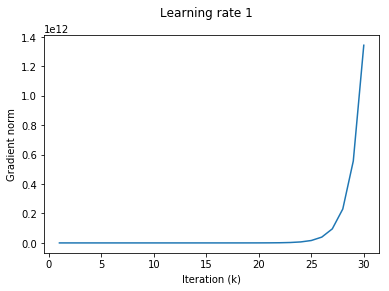

In [32]:
graph(data, lr)

### Step size variable

In [33]:
x = np.array([[-1], [2], [-3]])
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1], [0], [1]])
e = 10**-6
N = 30
lr = lambda *k : 1/k[0] if k[0] >0 else 1/0.1
data, f = gradientDescent(x, e, N, Q, c,  lr)
pd.set_option('display.expand_frame_repr', False)
data


Iter                                                 Xn                                         Directions    grad_abs
0      1                          [[29.0], [-78.0], [67.0]]                                   [[3], [-8], [7]]   11.045361
1      2                      [[-108.0], [174.0], [-146.0]]                      [[-137.0], [252.0], [-213.0]]  357.270206
2      3                         [[86.5], [-127.0], [86.5]]                       [[389.0], [-602.0], [465.0]]  854.371114
3      4  [[-13.833333333333329], [15.333333333333314], ...                      [[-301.0], [427.0], [-301.0]]  602.935320
4      5  [[-3.3333333333333357], [0.7499999999999929], ...  [[41.99999999999997], [-58.333333333333286], [...   83.251293
5      6  [[-2.0500000000000025], [-0.8833333333333386],...  [[6.416666666666664], [-8.166666666666657], [6...   12.208262
6      7  [[-1.680555555555558], [-1.2722222222222266], ...  [[2.2166666666666663], [-2.3333333333333277], ...    3.907898
7      8  [[-1.5250000000000024], [-1.3888888888888926],...  [[1.0888888888888895], [-0.8166666666666629], ...    1.743073
8      9  [[-1.4423611111111134], [-1.4229166666666702],...  [[0.6611111111111121], [-0.2722222222222195], ...    0.973777
9     10  [[-1.3910493827160515], [-1.4272376543209908],...  [[0.4618055555555567], [-0.03888888888888653],...    0.654248
10    11  [[-1.3555632716049404], [-1.420000000000003], ...  [[0.3548611111111122], [0.07237654320987863], ...    0.507042
11    12  [[-1.3290972222222242], [-1.4082842312009007],...  [[0.29112654320987774], [0.1288734567901253], ...    0.431414
12    13  [[-1.3082713711185951], [-1.3950863963711213],...  [[0.24991021324354756], [0.15837401795735317],...    0.387289
13    14  [[-1.291236267590436], [-1.3817302386399635], ...  [[0.221456345866069], [0.1736300505050523], [0...    0.358097
14    15  [[-1.2768975321232283], [-1.368802528490031], ...  [[0.2007422965409087], [0.18098794209905478], ...    0.336677
15    16  [[-1.2645646964061332], [-1.3565485289744572],...  [[0.1849925357564257], [0.1838099927336052], [...    0.319735
16    17  [[-1.2537783924162702], [-1.3450505499034167],...  [[0.17258086383780924], [0.18396766513664797],...    0.305634
17    18  [[-1.2442192021263216], [-1.3343126490225758],...  [[0.16250623492912375], [0.1825443149742929], ...    0.293494
18    19  [[-1.2356566601690957], [-1.324302266034103], ...  [[0.15412575523006744], [0.1801868937925084], ...    0.282802
19    20  [[-1.2279192362583542], [-1.3149711496272602],...  [[0.14701105430408834], [0.17729121173001472],...    0.273234
20    21  [[-1.2208758701138818], [-1.3062659582903697],...  [[0.14086732288944814], [0.1741038267378121], ...    0.264574
21    22  [[-1.2144241662121011], [-1.298133568940228], ...  [[0.1354857819373938], [0.17078017635297593], ...    0.256668
22    23  [[-1.2084825860537387], [-1.2905236232376711],...  [[0.13071476348397426], [0.16741880545625376],...    0.249403
23    24  [[-1.2029851274072254], [-1.2833896200042856],...  [[0.1264415488698063], [0.16408207436786482], ...    0.242689
24    25  [[-1.197877600956802], [-1.2766892456211973], ...  [[0.12258063481016523], [0.16080898519412035],...    0.236456
25    26  [[-1.1931149627051056], [-1.2703843140480457],...  [[0.11906595629240657], [0.15762328932879077],...    0.230648
26    27  [[-1.1886593622680992], [-1.2644405177908966],...  [[0.11584561136216553], [0.1545387026858802], ...    0.225217
27    28  [[-1.184478687944199], [-1.258827098863282], [...  [[0.1128782067453018], [0.1515623110455948], [...    0.220123
28    29  [[-1.1805454637647306], [-1.2535164980833475],...  [[0.11013027702511624], [0.14869682183816568],...    0.215333
29    30  [[-1.1768360006803817], [-1.2484840129579258],...  [[0.10757442944611362], [0.1459420686372339], ...    0.210817

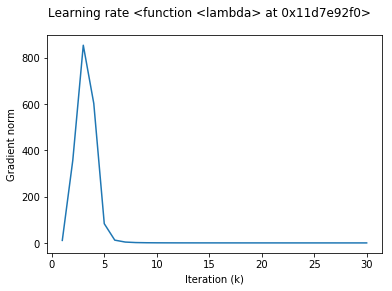

In [34]:
graph(data, lr)

## Conclusiones
* Al variar el learning rate se puede observar como cambia el numero de iteraciones necesarias para que converga
* Al usar learning rate como 1 / k se puede observar mejor el comportamiento tanto con learning rate pequeño como grande. Oscila y luego se normaliza.
* Por las gradicas con los diferentes sets de entrada, parece ser que el learning rate que da mejor resultado es 0.5
* El step size exacto fue el unico en converger antes de las 30 iteraciones



# Problema 2

In [47]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

def f2(x1, x2):
    return 100*(x2-x1**2) + (1 -x1)**2

def f2_prime(x1, x2):
    x1_val = 400*x1**3 - 400*x1*x2 + 2*x1 - 2
    x2_val = 200*x2-200*x1**2
    return x1_val, x2_val

def f2_prime_2(x1, x2):
    x11_val = 1200*x1 - 400*x2 + 2
    x12_val = -400*x1
    x21_val = -400*x1
    x22_val = 200
    
    return [[x11_val, x12_val], [x21_val, x22_val]]

### 1)

In [48]:
x = np.array([1, 1])
f_hat = f2_prime(x[0], x[1])
print(f_hat)
f_hat_2 = f2_prime_2(x[0], x[1])
print(f_hat_2)
print(is_pos_def(f_hat_2))

(0, 0)
[[802, -400], [-400, 200]]
True


### Conclusiones

De acuerdo a los teoremas de FONC y SONC, en el punto (0, 0) esta el mínimo global por ser 0 en su primer derivada  y en su segunda derivada dar una matriz PD

### 2)

In [37]:
x = np.array([0, 0])
lr = 0.05

def gradientDescent2(x0, N, lr):
    xi = x0
    f_hat = f2_prime(xi[0], xi[1])
    i = 0
    epochs = []
    f_vals = []
    directions = []
    Xn = []
    axs = []   
    ak = lr
    while np.linalg.norm(f_hat) >= 10**-8 and i < N:
     
        f_hat = f2_prime(xi[0], xi[1])

        xi = xi - np.multiply(ak, f_hat)

        i += 1
        epochs.append(i)
        Xn.append(xi)
        directions.append(np.multiply(-1,f_hat))
        f_vals.append(np.linalg.norm(f_hat))
    
    results = pd.DataFrame({'Iter':epochs, 'Xn':Xn, 'Directions': directions, 'grad_abs': f_vals})
    return results, f_hat

data, f = gradientDescent2(x.transpose(), 1000, lr)
pd.set_option('display.expand_frame_repr', False)
data


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Iter                                                 Xn                                         Directions       grad_abs
0     1                                         [0.1, 0.0]                                             [2, 0]   2.000000e+00
1     2         [0.16999999999999998, 0.10000000000000003]                          [1.4, 2.0000000000000004]   2.441311e+00
2     3          [0.4947400000000002, -0.6110000000000004]           [6.494800000000003, -14.220000000000008]   1.563300e+01
3     4           [-7.922383917368489, 7.9466766760000045]           [-168.34247834736976, 171.1535335200001]   2.400682e+02
4     5              [8678.67391871237, 556.1215792577889]           [173731.92605259476, 10963.498051635775]   1.740775e+05
5     6             [-13073350411199.648, 753188804.77917]          [-261467008397566.44, 15063764973.151814]   2.614670e+14
6     7    [4.468797768308565e+40, 1.7091249097401403e+27]       [8.93759553661713e+41, 3.41824981948028e+28]   8.937596e+41
7     8  [-1.7848515473388738e+123, 1.9970153494039608e...  [-3.5697030946777474e+124, 3.9940306988079214e...  3.569703e+124
8     9                     [inf, 3.1856950460379716e+247]                      [inf, 6.371390092075944e+248]            inf
9    10                                         [nan, inf]                                         [nan, inf]            NaN

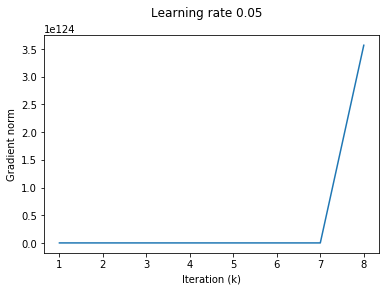

In [38]:
graph(data, lr)

In [39]:
x = np.array([0.5, 0.5])
lr = 0.0005
data, f = gradientDescent2(x.transpose(), 10000, lr)
pd.set_option('display.expand_frame_repr', False)
data


Iter                                         Xn                                    Directions   grad_abs
0         1                            [0.5255, 0.475]                                 [51.0, -50.0]  71.421285
1         2      [0.546873608725, 0.45511502499999995]               [42.747217449999994, -39.76995]  58.386416
2         3   [0.5643940349393091, 0.4395105968919904]        [35.04085242861804, -31.2088562160191]  46.923918
3         4  [0.5784845868238124, 0.42741359987029875]     [28.181103769006775, -24.193994043383277]  37.141943
4         5   [0.5896392106992333, 0.4181366816025406]     [22.309247750841834, -18.553836535516353]  29.016330
5         6  [0.5983590364523911, 0.41109045332168803]      [17.43965150631564, -14.092456561705148]  22.421837
6         7    [0.605110094540744, 0.4057847616399426]      [13.502116176705831, -10.61138336349083]  17.172903
7         8  [0.6103006677293454, 0.40182210812745917]      [10.381146377202777, -7.925307024966884]  13.060578
8         9    [0.61427346707185, 0.39888658781780173]       [7.9455986850092355, -5.87104061931484]   9.879355
9        10  [0.6173072891083029, 0.39673111827086865]     [6.0676440729057015, -4.3109390938660965]   7.443151
10       11    [0.6196237375315942, 0.395164835362406]        [4.632896846582456, -3.13256581692535]   5.592558
11       12  [0.6213959447607701, 0.39404170943742756]      [3.544414458351816, -2.2462518499568205]   4.196251
12       13    [0.622757446732364, 0.3932508305101978]     [2.7230039431877353, -1.5817578544595108]   3.149081
13       14  [0.6238102556981623, 0.39270843120523935]      [2.105617931596642, -1.0847986099169304]   2.368631
14       15   [0.624631745667701, 0.39235151159613607]     [1.6429799390772886, -0.7138392182065445]   1.791354
15       16   [0.6252802896076649, 0.3921328422061104]       [1.2970878799278827, -0.43733878005132]   1.368832
16       17  [0.6257997494038704, 0.39201710204268386]      [1.0389195924109365, -0.231480326853017]   1.064395
17       18   [0.6262229842800333, 0.3919779244738102]     [0.8464697523258964, -0.0783551377473799]   0.850089
18       19  [0.6265745552324999, 0.39199565463048824]     [0.7031419049331626, 0.03546031335612554]   0.704035
19       20  [0.6268727893954817, 0.39205565649391994]     [0.5964683259636874, 0.12000372686335936]   0.608420
20       21  [0.6271313446221976, 0.39214704025297514]     [0.5171104534315192, 0.18276751811042402]   0.548459
21       22  [0.6273603890878465, 0.39226170856844217]      [0.4580889312979832, 0.2293366309340712]   0.512290
22       23    [0.627567487209753, 0.3923936434912434]     [0.4141962438129547, 0.26386984560240023]   0.491107
23       24   [0.6277582630948983, 0.3925383742423954]      [0.3815517702907121, 0.2894615023040217]   0.478926
24       25   [0.6279368963187176, 0.3926925805065482]     [0.3572664476385059, 0.30841252830563803]   0.471972
25       26   [0.6281064918134808, 0.3928537970317318]       [0.339190989526325, 0.3224330503671382]   0.467989
26       27   [0.6282693554977435, 0.3930201938343824]    [0.32572736852555306, 0.33279360530129054]   0.465671
27       28   [0.6284271994770109, 0.3931904127566992]     [0.31568795853462306, 0.3404378446335272]   0.464281
28       29  [0.6285812947030254, 0.39336344598528117]      [0.3081904520290635, 0.3460664571639285]   0.463404
29       30   [0.6287325844821469, 0.3935385457918062]     [0.3025795582428965, 0.35019961305009417]   0.462811
...     ...                                        ...                                           ...        ...
9970   9971   [0.9687153884418854, 0.9382819402322012]  [0.013143005757271009, 0.025518174037557628]   0.028704
9971   9972   [0.9687219584944204, 0.9382946965893924]   [0.013140105070037711, 0.02551271438233016]   0.028698
9972   9973   [0.9687285270969624, 0.9383074502173797]   [0.01313720508399241, 0.025507255974673626]   0.028692
9973   9974   [0.9687350942498619, 0.9383202011167867]   [0.013134305799059165, 0.02550

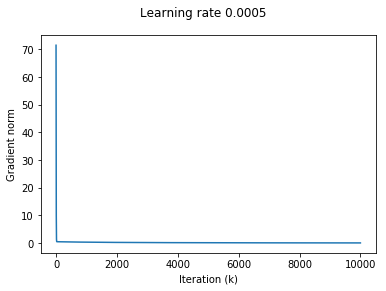

In [40]:
graph(data, lr)

In [41]:
x = np.array([0.5, 0.5])
lr = 0.0009
data, f = gradientDescent2(x.transpose(), 100000, lr)
pd.set_option('display.expand_frame_repr', False)
data


Iter                                         Xn                                       Directions      grad_abs
0          1                            [0.5459, 0.455]                                    [51.0, -50.0]  7.142129e+01
1          2         [0.5775703096715601, 0.4267412258]        [35.189232968399985, -31.398637999999984]  4.716096e+01
2          3   [0.5976997083402774, 0.4099735484265383]         [22.365998520797042, -18.63075263717964]  2.910915e+01
3          4   [0.6097695631707546, 0.4004823991527709]        [13.410949811641263, -10.545721415297123]  1.706065e+01
4          5   [0.6167641000981475, 0.3953229729357737]          [7.771707697103274, -5.732695796663592]  9.657290e+00
5          6   [0.6207678021724503, 0.3926364697379124]          [4.448557860336374, -2.985003553179183]  5.357230e+00
6          7   [0.6230781788292877, 0.3913253847436108]        [2.5670851742637697, -1.4567611047795879]  2.951623e+00
7          8  [0.6244517618264323, 0.39076757053774075]         [1.526203330160515, -0.6197935620777884]  1.647252e+00
8          9   [0.6253137880517944, 0.3906186083536118]       [0.9578069170690418, -0.16551353792108614]  9.720025e-01
9         10  [0.6258984650276644, 0.39069037888494484]        [0.6496410843000084, 0.07974503481452189]  6.545172e-01
10        11   [0.6263333407496291, 0.3908809106199723]         [0.483195246627409, 0.21170192780832053]  5.275371e-01
11        12   [0.6266874405110242, 0.3911351683806037]        [0.39344417932794884, 0.2825086229237428]  4.843650e-01
12        13   [0.626997984514164, 0.39142352472906156]         [0.3450488923775967, 0.3203959427309684]  4.708634e-01
13        14   [0.6272849999876521, 0.3917300553430988]         [0.3189060816534055, 0.3405895711524636]  4.665858e-01
14        15  [0.6275592485900482, 0.39204621019905256]         [0.3047206693290134, 0.3512831732819848]  4.650318e-01
15        16   [0.6278265078563039, 0.3923674022515862]         [0.2969547402841599, 0.3568800583706775]  4.642688e-01
16        17  [0.6280898774798035, 0.39269117216036814]       [0.29263291499951816, 0.35974434309108005]  4.637349e-01
17        18   [0.6283510196375457, 0.3930162021261689]         [0.2901579530469116, 0.3611444064452911]  4.632677e-01
18        19   [0.6286108253288183, 0.3933417864417763]          [0.2886729903029055, 0.361760350674885]  4.628203e-01
19        20   [0.628869772073427, 0.39366754743196064]       [0.28771860512082004, 0.36195665576035196]  4.623793e-01
20        21   [0.6291281158088017, 0.3939932831351909]        [0.28704859486079637, 0.3619285591446868]  4.619407e-01
21        22   [0.6293859937830739, 0.3943188856690605]         [0.2865310825247509, 0.3617805931884135]  4.615033e-01
22        23    [0.6296434796979552, 0.394644297499285]         [0.2860954609791846, 0.3615687002494212]  4.610667e-01
23        24   [0.6299006132472543, 0.3949694880241206]        [0.2857039436656923, 0.36132280537286476]  4.606310e-01
24        25   [0.6301574159326205, 0.3952944410422469]        [0.2853363170736085, 0.36105890902929616]  4.601960e-01
25        26  [0.6304138995279247, 0.39561914804852044]        [0.2849817725602042, 0.36078556252614646]  4.597617e-01
26        27   [0.630670070607268, 0.39594360464902756]         [0.28463453260358706, 0.360507333896777]  4.593282e-01
27        28  [0.6309259329661602, 0.39626780864496236]         [0.2842915098802441, 0.3602266621497705]  4.588953e-01
28        29   [0.6311814889155807, 0.3965917590089287]         [0.2839510549117332, 0.3599448488514696]  4.584632e-01
29        30   [0.6314367399733178, 0.3969154553382656]        [0.2836122863746606, 0.35966258815211916]  4.580318e-01
...      ...                                        ...                                              ...           ...
46669  46670   [0.9999999887105431, 0.9999999773759105]     [4.51014270375083e-09, 9.03844465938164e-09]  1.010123e-08
46670  46671   [0.9999999887146008, 0.9999999773840421]    [4.50861836753802e-09,

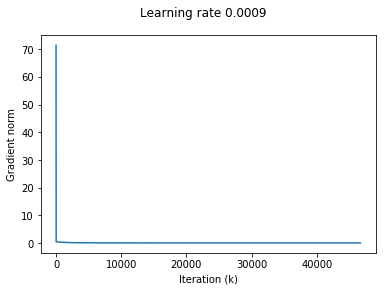

In [42]:
graph(data, lr)

## Conclusiones
* Despues de varias pruebas el problema convergio a su minimo global absoluto (1,1), pero se tuvo que modificar el numero de iteraciones y el learning rate ya que la busqueda se saltaba muy rapido el centro y crecia exponencialmente.